In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import pingouin as pg
import plotly.express as px
import seaborn as sns 
from statannot import add_stat_annotation
import os
import copy
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\essie-adm-qizhu\AppData\Roaming\Python\Python38\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [33]:
path="../../data/raw_data/"

data_raw = []
data_auto = []
data_control = []
data_self = []

data_analysis = pd.DataFrame()

for home, dirs, files in os.walk(path):
    for filename in files:
        t = pd.read_csv(home+"/"+filename,index_col=0)
        t.columns = t.columns.str.replace(' ', '')
        t = t.reset_index()

        t[["participant_id"]] = filename[0:2]
        t[["condition"]] = filename[3:7]
        t[["eventStatusDiff","ExperimentStartedDiff"]] = t[["eventStatus","ExperimentStarted"]].ne(t[["eventStatus","ExperimentStarted"]].shift().bfill()).astype(int) # faster

        # data_light["state_change"] = data_light["light_state"].diff()
        end_index = t[t['eventStatusDiff'] != 0]
        start_index = t[t['ExperimentStartedDiff'] != 0]
        if len(end_index) == 0:
            time_period = len(t) - start_index['Time.time'].values[0]
        else:
            time_period = end_index['Time.time'].values[0] - start_index['Time.time'].values[0]

        if time_period > 600:
            time_period = 600
            mission = 'false'
        else:
            mission = 'complete'
        condition = t[["condition"]][0:1].values.ravel()[0]
        participant_id = t[["participant_id"]][0:1].values.ravel()[0]

        print(participant_id + condition)        
        data_analysis = data_analysis.append(pd.DataFrame([[condition,participant_id,time_period,mission
                                                            ]],
                                                columns=["condition","participant_id","time_period","mission_state"
                                                        ]),
                                                ignore_index=True)

10cont
10glob
10mini
10rout
11cont
11glob
11mini
11rout
12cont
12glob
12mini
12rout
13cont
13glob
13mini
13rout
14cont
14glob
14mini
14rout
15cont
15glob
15mini
15rout
16cont
16glob
16mini
16rout
17cont
17glob
17mini
17rout
18cont
18glob
18mini
18rout
19cont
19glob
19mini
19rout
20cont
20glob
20mini
20rout
21cont
21glob
21mini
21rout
22cont
22glob
22mini
22rout
23cont
23glob
23mini
23rout
24cont
24glob
24mini
24rout
25cont
25glob
25mini
25rout
26cont
26glob
26mini
26rout
27cont
27glob
27mini
27rout
28cont
28glob
28mini
28rout
29cont
29glob
29mini
29rout
30cont
30glob
30mini
30rout
31cont
31glob
31mini
31rout
32cont
32glob
32mini
32rout
33cont
33glob
33mini
33rout
34cont
34glob
34mini
34rout
35cont
35glob
35mini
35rout
36cont
36glob
36mini
36rout
37cont
37glob
37mini
37rout
38cont
38glob
38mini
38rout
39cont
39glob
39mini
39rout


In [3]:
time_period

357.9372

In [22]:
data_analysis

,condition,participant_id,time_period,mission_state
0,cont,10,357.9372,complete
1,glob,10,276.3626,complete
2,mini,10,293.5152,complete
3,rout,10,207.3150,complete
4,cont,11,286.2123,complete
...,...,...,...,...
115,rout,38,600.0000,false
116,cont,39,242.5567,complete
117,glob,39,241.3740,complete
118,mini,39,275.3071,complete


In [32]:
data_analysis.groupby('condition').get_group('cont')

,condition,participant_id,time_period,mission_state
0,cont,10,357.9372,complete
4,cont,11,286.2123,complete
8,cont,12,494.3708,complete
12,cont,13,372.0445,complete
20,cont,15,333.7710,complete
24,cont,16,314.7048,complete
28,cont,17,305.3382,complete
32,cont,18,457.4531,complete
36,cont,19,450.1837,complete
40,cont,20,372.9976,complete


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Using zero_method  wilcox
rout v.s. cont: Wilcoxon test (paired samples), P_val=3.836e-01 stat=2.160e+02
Using zero_method  wilcox
cont v.s. mini: Wilcoxon test (paired samples), P_val=2.142e-01 stat=2.710e+02
Using zero_method  wilcox
mini v.s. glob: Wilcoxon test (paired samples), P_val=1.659e-04 stat=4.070e+02
Using zero_method  wilcox
rout v.s. mini: Wilcoxon test (paired samples), P_val=1.067e-01 stat=2.930e+02
Using zero_method  wilcox
cont v.s. glob: Wilcoxon test (paired samples), P_val=8.057e-05 stat=3.920e+02
Using zero_method  wilcox
rout v.s. glob: Wilcoxon test (paired samples), P_val=1.589e-04 stat=3.840e+02


TypeError: Neither the `x` nor `y` variable appears to be numeric.

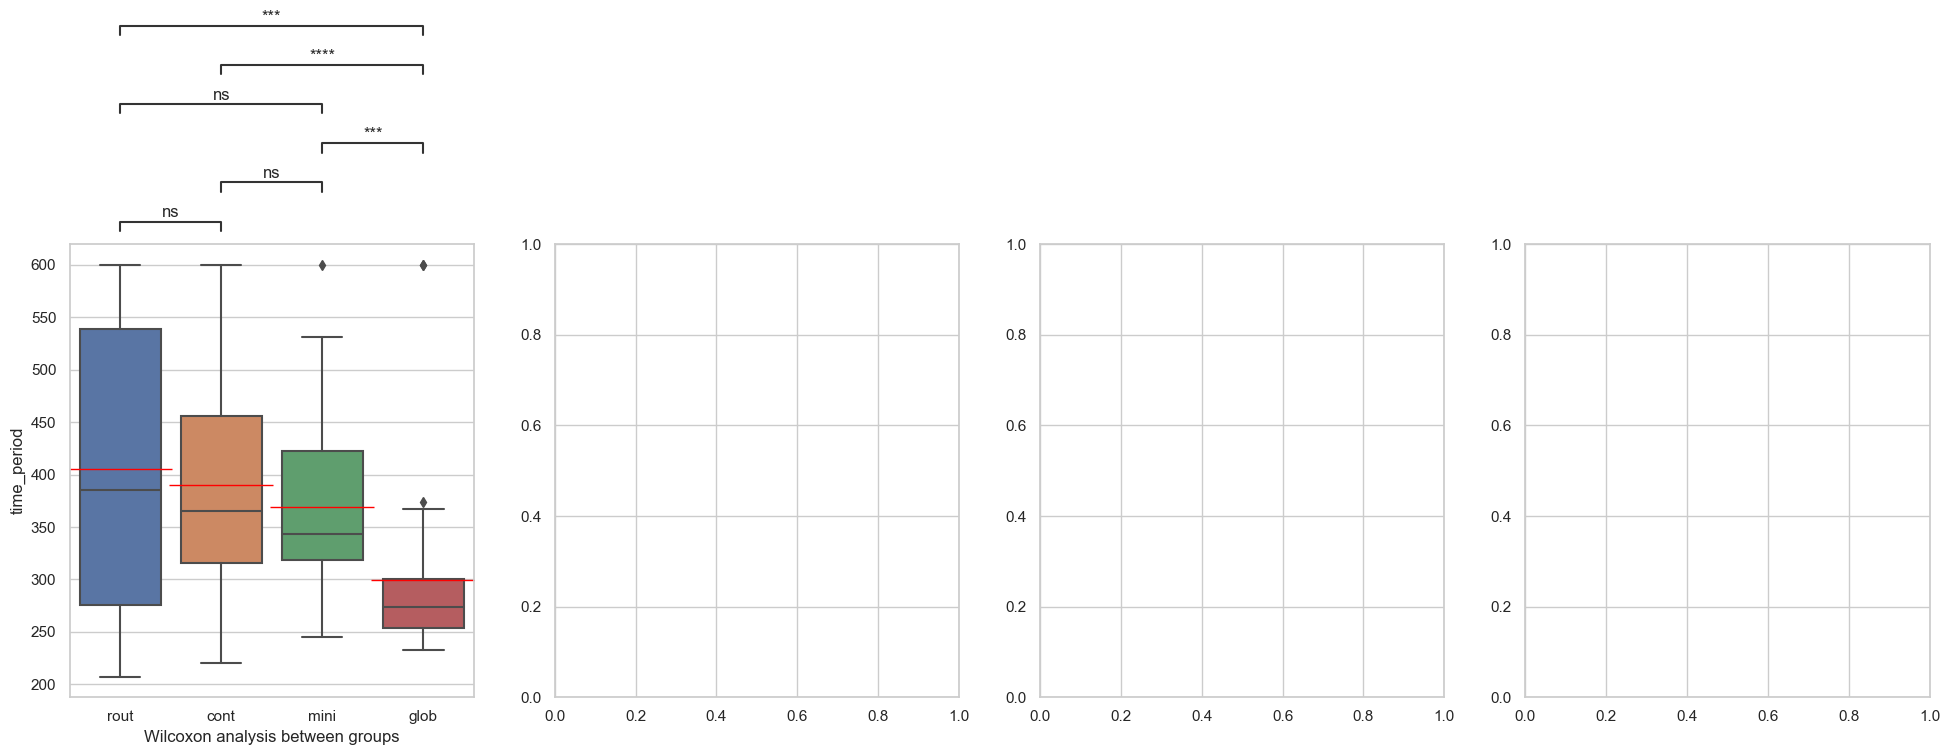

In [35]:
### pair analysis visualization 
sns.set(style = 'whitegrid')
x = 'condition'
y_list = ["time_period","mission_state"]  

order = ["cont","rout","mini","glob"]
method = 'Wilcoxon'
# method = 'Kruskal'
data = data_analysis
plot_line = 0
box_pairs=[
         (order[0], order[1]),
         (order[0], order[2]),
         (order[0], order[3]),
         (order[1], order[2]),
         (order[1], order[3]),
         (order[2], order[3]),
            ]


fig, axes = plt.subplots(1,4, figsize=(24,6), dpi=100)

y = y_list[0]
axes[0] = sns.boxplot(ax = axes[0], data=data, x=x, y=y, order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
# axes[0] = sns.violinplot(ax = axes[0], data=data, x=x, y=y, order=order)
test_results = add_stat_annotation(ax=axes[0], data=data, x=x, y=y, order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'less'}
                                 )
axes[0].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[1]
axes[1] = sns.boxplot(ax = axes[1],data=data, x=x, y=y,order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
test_results = add_stat_annotation(ax=axes[1], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'less'}
                                 )
axes[1].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[2]
axes[2] = sns.boxplot(ax = axes[2],data=data, x=x, y=y,order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
test_results = add_stat_annotation(ax=axes[2], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'less'}
                                 )
axes[2].set(xlabel = method + ' analysis between groups', ylabel=y)

y = y_list[3]
axes[3] = sns.boxplot(ax = axes[3],data=data, x=x, y=y,order=order, showmeans=True, meanprops={"marker":"_","markerfacecolor":"white","markeredgecolor":"red","markersize":"75"})
test_results = add_stat_annotation(ax=axes[3], data=data, x=x, y=y,order=order,
                                 box_pairs=box_pairs,
                                 test=method, 
                                 comparisons_correction=None, 
                                 text_format='star', loc='outside', verbose=1,
                                 # stats_params={'alternative': 'greater'}
                                 )
axes[3].set(xlabel = method + ' analysis between groups', ylabel=y)